<a href="https://colab.research.google.com/github/EduardoMoraesRitter/machine-learning-algoritmos-nao-supervisionados/blob/master/agrupamento_hier%C3%A1rquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#fazer um sistema de recomendacao com filmes pelo generos agrupando por agrupamento hierárquico

1.   pegar os dados
2.   conhecendo os dados
1.   mudar os nomes, columns = ['
2.   extrair os dados passando dados para coulunas binarias, get_dummies
1.   junto os dois dataframe, pd.concat([
2.   gerar um escala/nivel de genero sendo um filmes mais de comedia doque animaçao, StandardScaler
1.   algoritimo calcula a ditancia do grupo com uma arvore, matriz de distancia
2.   técnica chamada "top down" e "bottom up".
2.   Visualizar os grupos Diminuir as dimençoes com TNSE para visualias os grupos usando o SEABORN
1.   Visualizar os grupos por arvore - dendrograma


o agrupamento hieraquico funcina calculando a distancia entre os pontos, com pegamos a distancia do filmes pela recorencia tirada do kmean e o escalamento tidado do StandardScaler


https://www.saedsayad.com/clustering_hierarchical.htm






In [7]:
import pandas as pd

uri = 'https://raw.githubusercontent.com/EduardoMoraesRitter/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes_df = pd.read_csv(uri)

filmes_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
filmes_df.columns = ['filme_id', 'titulo', 'generos']
filmes_df.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
type(filmes_df)

pandas.core.frame.DataFrame

In [10]:
type(filmes_df.generos)

pandas.core.series.Series

In [11]:
filmes_df.generos.str

In [12]:
filmes_df.generos

0       Adventure|Animation|Children|Comedy|Fantasy
1                        Adventure|Children|Fantasy
2                                    Comedy|Romance
3                              Comedy|Drama|Romance
4                                            Comedy
                           ...                     
9737                Action|Animation|Comedy|Fantasy
9738                       Animation|Comedy|Fantasy
9739                                          Drama
9740                               Action|Animation
9741                                         Comedy
Name: generos, Length: 9742, dtype: object

In [13]:
filmes_df.generos.str.get_dummies()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
generos_df = filmes_df.generos.str.get_dummies()
#axis eixo de concatenacao
dados_filmes_df = pd.concat([filmes_df, generos_df], axis=1)
dados_filmes_df.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
#para escalar os dados usar a biblioteca de escalamento
from sklearn.preprocessing import StandardScaler

#treina o escalamneto
scaler = StandardScaler()
generos_escalados_ndarray = scaler.fit_transform(generos_df)

generos_escalados_ndarray

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [16]:
generos_escalados_ndarray.shape

(9742, 20)

In [17]:
#escalado Toy Story
print(generos_escalados_ndarray[53])
print(dados_filmes_df.loc[53])

[-0.05917995 -0.48060698  2.59101927 -0.25867916  3.69752441 -0.7921263
 -0.37463158 -0.21748944 -0.90024672  3.3920166  -0.09492563 -0.3340552
 -0.12839708 -0.18841895 -0.24998637 -0.44263346 -0.33443476 -0.49125897
 -0.20201972 -0.13206534]
filme_id                                              60
titulo                Indian in the Cupboard, The (1995)
generos                       Adventure|Children|Fantasy
(no genres listed)                                     0
Action                                                 0
Adventure                                              1
Animation                                              0
Children                                               1
Comedy                                                 0
Crime                                                  0
Documentary                                            0
Drama                                                  0
Fantasy                                                1
Film-Noir       

In [0]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados_ndarray)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [20]:
#grafico de dispersao
#TSNE reduzir as dimensoes
from sklearn.manifold import TSNE
tsne = TSNE()
visulizar = tsne.fit_transform(generos_escalados_ndarray)
visulizar

array([[ 22.733076 , -65.53875  ],
       [-19.533434 , -23.884151 ],
       [-36.044724 ,  15.717652 ],
       ...,
       [ -2.1637993,  27.419188 ],
       [ 37.84202  , -50.762264 ],
       [  4.677716 , -13.270248 ]], dtype=float32)

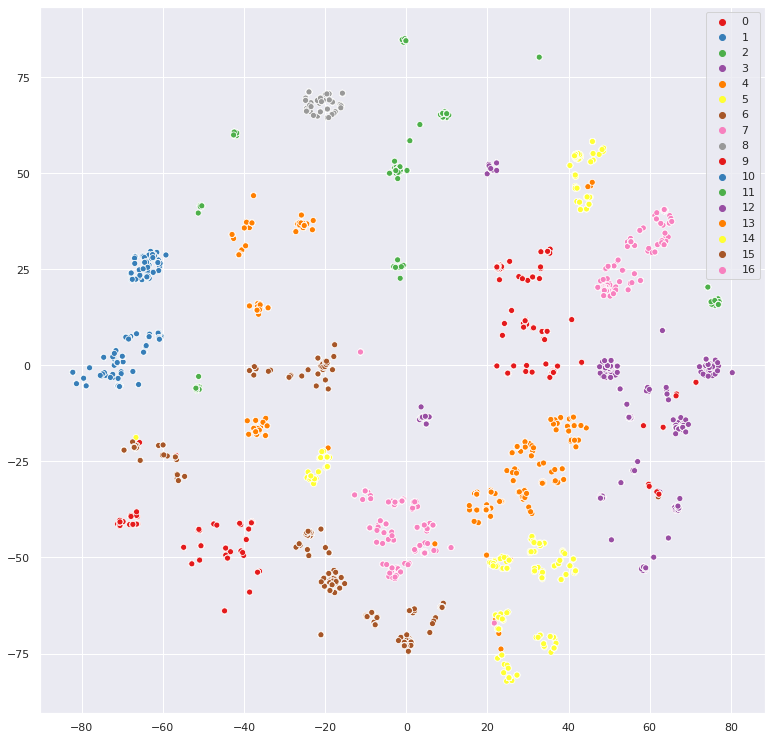

In [21]:
#SEABORN, !pip install seaborn para pegar nova versao 
import seaborn as sns
sns.set(rc={'figure.figsize':(13,13)})
sns.scatterplot(x=visulizar[:,0], 
                y=visulizar[:,1], 
                hue=grupos,
                palette=sns.color_palette('Set1', 17))

In [0]:
#dendrograma arvore, linkage matriz de distancia
from scipy.cluster.hierarchy import dendrogram, linkage

In [23]:
#agrupar os filmes usando Cluesteriracao - KMeans
from sklearn.cluster import KMeans

#criar um modele, passando o numero de grupos n_clusters
modelo = KMeans(n_clusters = 17)
modelo.fit(generos_escalados_ndarray)

grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos_df.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,-0.456038,-0.357392,-0.238898,-0.260936,-0.599974,-0.338134,4.597924,-0.808616,-0.277127,-0.094926,-0.318096,-0.128397,-0.188419,-0.229602,-0.429675,-0.334435,-0.479140,-0.078470,-0.132065
1,-0.059180,-0.211670,-0.291058,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,0.924784,-0.211856,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.245087,0.018848,-0.202020,-0.132065
2,-0.059180,-0.440080,-0.027959,0.563605,0.721543,0.248153,-0.297570,-0.034626,-0.181104,0.265214,-0.094926,-0.260343,-0.128397,5.307322,-0.182736,0.326878,-0.260790,-0.467270,-0.169412,-0.132065
3,-0.059180,-0.333405,-0.317512,-0.163864,-0.270451,-0.744895,1.444723,-0.217489,0.255531,-0.252433,10.534563,-0.257559,-0.128397,-0.188419,0.922484,-0.194188,-0.219795,0.699553,-0.202020,-0.043513
4,-0.059180,1.385859,1.714682,-0.252728,-0.270451,-0.421536,-0.365847,-0.217489,-0.554914,0.604286,-0.094926,-0.281237,-0.128397,-0.188419,-0.243853,-0.302278,1.570108,0.278098,-0.202020,-0.132065
5,-0.059180,0.128485,0.249380,-0.183231,-0.125281,-0.303544,-0.189027,-0.188127,-0.189021,-0.159926,-0.094926,-0.192025,-0.128397,0.146687,-0.172239,-0.113141,-0.192533,-0.244737,0.112129,7.572010
6,-0.059180,-0.317713,-0.299398,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.304605,-0.178689,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.251875,-0.446875,-0.202020,-0.132065
7,-0.059180,-0.191556,0.911226,-0.258679,3.697524,0.392944,-0.346005,-0.217489,-0.465254,0.860935,-0.094926,-0.313193,-0.128397,-0.188419,-0.116751,-0.307118,0.009485,-0.475417,-0.202020,-0.132065
8,-0.059180,-0.139099,-0.245856,-0.193982,-0.239330,-0.526243,0.484828,-0.217489,0.136826,0.001582,-0.094926,0.520674,-0.128397,-0.188419,4.000218,-0.145961,0.056689,1.163577,-0.202020,-0.132065
9,-0.059180,-0.422688,-0.281231,-0.258679,-0.270451,0.458844,-0.374632,-0.217489,0.317502,-0.072489,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,2.259206,-0.248119,-0.417189,-0.202020,-0.132065


In [24]:
#gera a matriz de distancia
matriz_distancia = linkage(grupos)
matriz_distancia

array([[ 1.        ,  6.        ,  2.44170762,  2.        ],
       [13.        , 14.        ,  2.75164953,  2.        ],
       [ 9.        , 17.        ,  2.89071208,  3.        ],
       [18.        , 19.        ,  3.22417706,  5.        ],
       [ 4.        , 20.        ,  3.59900119,  6.        ],
       [12.        , 21.        ,  3.80061329,  7.        ],
       [ 7.        , 22.        ,  4.38126404,  8.        ],
       [ 8.        , 23.        ,  4.66610677,  9.        ],
       [15.        , 24.        ,  4.67864505, 10.        ],
       [ 0.        , 25.        ,  5.15481109, 11.        ],
       [16.        , 26.        ,  5.23216988, 12.        ],
       [ 2.        , 27.        ,  5.81688171, 13.        ],
       [ 5.        , 28.        ,  7.85637346, 14.        ],
       [10.        , 29.        ,  8.07566953, 15.        ],
       [ 3.        , 30.        , 10.78810923, 16.        ],
       [11.        , 31.        , 17.06517087, 17.        ]])

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'b'],
 'dcoord': [[0.0, 2.751649534715491, 2.751649534715491, 0.0],
  [0.0, 2.44170762230625, 2.44170762230625, 0.0],
  [0.0, 2.8907120799409243, 2.8907120799409243, 2.44170762230625],
  [2.751649534715491,
   3.224177058350191,
   3.224177058350191,
   2.8907120799409243],
  [0.0, 3.5990011878376924, 3.5990011878376924, 3.224177058350191],
  [0.0, 3.8006132884476327, 3.8006132884476327, 3.5990011878376924],
  [0.0, 4.381264040791288, 4.381264040791288, 3.8006132884476327],
  [0.0, 4.666106767972285, 4.666106767972285, 4.381264040791288],
  [0.0, 4.6786450537516995, 4.6786450537516995, 4.666106767972285],
  [0.0, 5.154811091306679, 5.154811091306679, 4.6786450537516995],
  [0.0, 5.232169882260877, 5.232169882260877, 5.154811091306679],
  [0.0, 5.816881708159355, 5.816881708159355, 5.232169882260877],
  [0.0, 7.8563734605437885, 7.8563734605437885, 5.816881708159355],

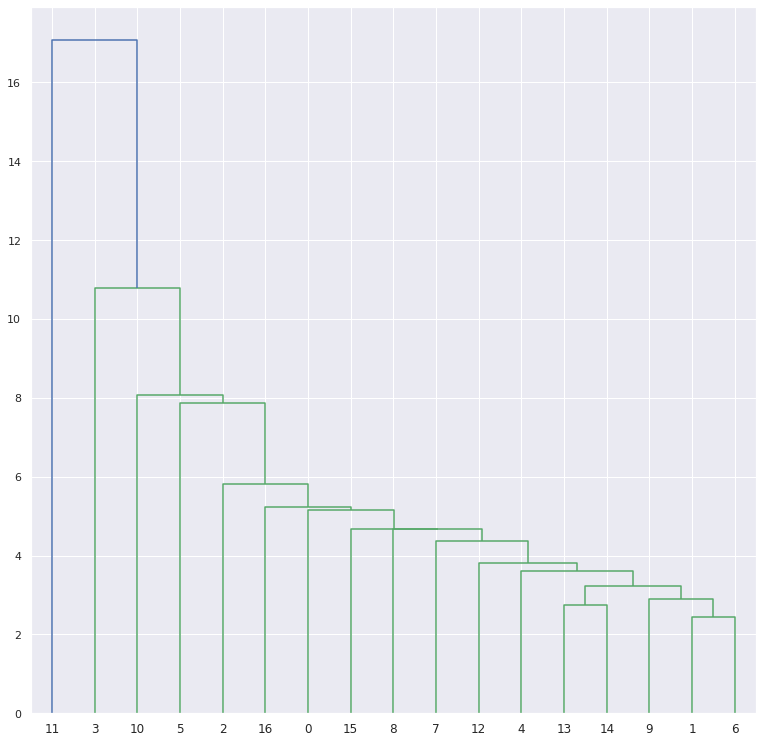

In [26]:
dendrogram = dendrogram(matriz_distancia)
dendrogram